# Introduction

# Imports 

In [9]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

# Read Data

In [10]:
df = pd.read_csv("../data/toy_data.csv", index_col=0)

In [11]:
df.head()

,pressure (psi),temperature (deg F),failure
0,15.020932,192.804706,yes
1,15.344324,199.772074,yes
2,15.089475,197.309593,yes
3,14.220017,199.039052,yes
4,14.235332,205.322159,yes


In [12]:
x_label = 'pressure (psi)'
y_label = 'temperature (deg F)'
target_label = 'failure'

# Visualize The dataset

In [13]:
df['color'] = df[target_label].map({'no':'green', 'yes':'red'})

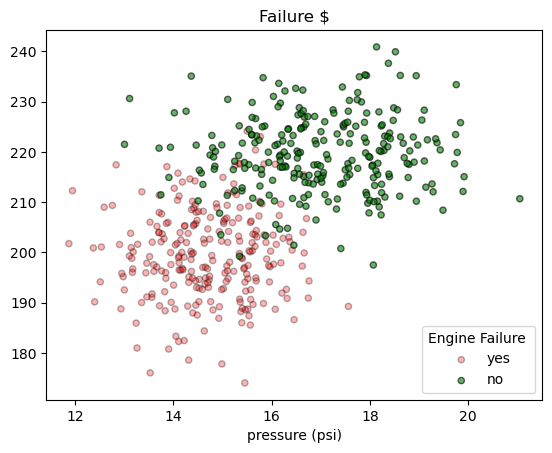

In [14]:
# colors = []
# for y in y_test:
#     if y == 'yes':
#         colors.append('green')
#     else:
#         colors.append('red')
# for_scatter = X_test.copy(deep=True)
        
# for_scatter[target_label] = y_test
# for_scatter['color'] = colors

yesses = df[df[target_label]=='yes']
nos = df[df[target_label]=='no']

fig, ax = plt.subplots(1,1)

ax.scatter(yesses[x_label], yesses[y_label], c=yesses['color'], s=20, edgecolor="k", label='yes', alpha=0.3)
ax.set_xlabel(x_label)

ax.scatter(nos[x_label], nos[y_label], c=nos['color'], s=20, edgecolor="k", label='no', alpha=0.6)

ax.legend(title='Engine Failure ')

ax.set_title('Failure $')

plt.show()

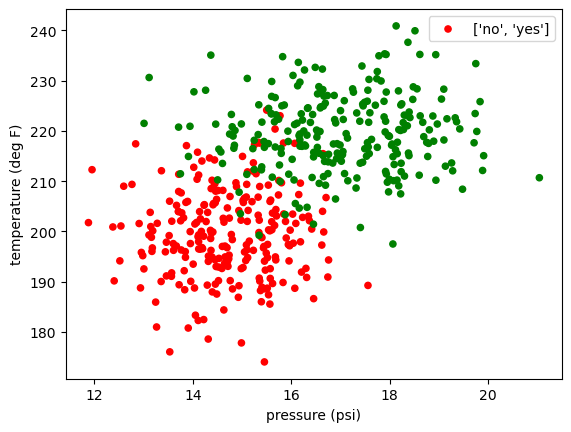

In [15]:
fig, ax = plt.subplots(1,1)


df.plot.scatter(x=x_label, 
                y=y_label, 
                ax=ax, 
                c=df[target_label].map({'no':'green', 'yes':'red'}),
                label=['no', 'yes'])
ax.legend();

# Generate Training and Testing Data

In [16]:
# Separate feature names from class names
feat_names = [x_label, y_label]
unique_labels = df[target_label].unique()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df[feat_names],
                                                    df[target_label],
                                                    test_size=0.25,
                                                    random_state=42)

# Training and Fitting the Model

In [18]:
log_reg_classifier = LogisticRegression(random_state=0)
log_reg_classifier = log_reg_classifier.fit(X_train, y_train)

# Making Predictions

In [19]:
predictions = log_reg_classifier.predict(X_test)
probabilities = log_reg_classifier.predict_proba(X_test)
results_df = pd.DataFrame({'prob of no':probabilities[:,0],
                         'prob of yes':probabilities[:,1],
                         'predicted class':predictions,
                         'actual class': y_test})
results_df.head()

,prob of no,prob of yes,predicted class,actual class
361,0.999950,0.000050,no,no
73,0.000237,0.999763,yes,yes
374,0.947341,0.052659,no,no
155,0.054426,0.945574,yes,yes
104,0.007709,0.992291,yes,yes


# Checking Accuracy

In [20]:
accuracy = log_reg_classifier.score(X_test, y_test)
accuracy

0.912

# Visualizing Decision Boundaries

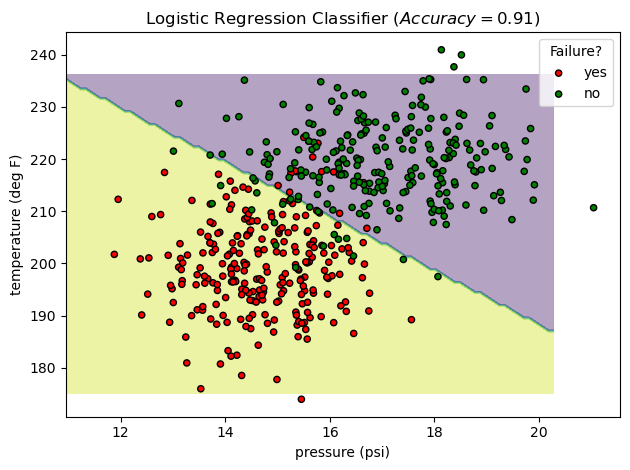

In [23]:
fig, ax = plt.subplots(1,1)
DecisionBoundaryDisplay.from_estimator(log_reg_classifier, X_test, alpha=0.4, response_method="predict", ax=ax)
ax.scatter(yesses[x_label], yesses[y_label], c=yesses['color'], s=20, edgecolor="k", label='yes')
ax.scatter(nos[x_label], nos[y_label], c=nos['color'], s=20, edgecolor="k", label='no')
ax.legend(title='Failure?')
ax.set_title(f'Logistic Regression Classifier $(Accuracy = {accuracy:.2f})$')
plt.tight_layout()
plt.show()

# Confusion Matrix

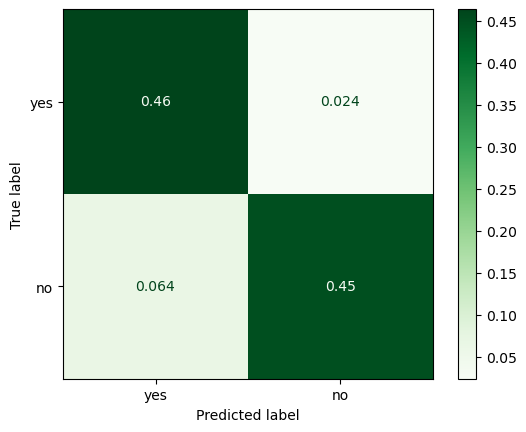

In [22]:
cm = confusion_matrix(y_test, predictions,
                      labels=unique_labels,
                      normalize='all')
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
cm_display.plot(cmap='Greens')
plt.show()